In [ ]:
#import bedtool
import numpy as np
from pybedtools import BedTool
fmrp_binding_regions = BedTool('/home/hsher/project_another/FMRP_UABP2L/renormalize_snake/output/FMRP_MBL_Neu_new2.peaks.normed.compressed.filtered.annotate.bed')

In [ ]:
# look at the first line
# the most important columns are 0,1,2,5-> chromosome,start,end,strand. These define a "region"
print(fmrp_binding_regions[0]) # chromosome, start, end, score(not important), name(not important), strand...m0

# Task 1
1. count how many "regions" do FMRP bind using len()
2. count how many unqiue genes do FMRP bind using a combination of for loop and set()
3. How many % of FMRP binding regions are in "CDS"/"UTR"/"intron".

In [3]:
#1-1
len(fmrp_binding_regions)


15153

In [17]:
# 1-2
gene_id=[]
for region in fmrp_binding_regions:
    gene_id.append(region[6])

gene_id=set(gene_id)
len(gene_id)

2106

In [18]:
# 1-3
from collections import Counter 
c=Counter()
for region in fmrp_binding_regions:
    c[region[8]] +=1        

In [19]:
c

Counter({'CDS': 13672,
         '5utr': 812,
         '3utr': 486,
         'distintron500': 54,
         'noncoding_exon': 63,
         'proxintron500': 29,
         'miRNA': 11,
         'stop_codon': 5,
         'distnoncoding_intron500': 17,
         'proxnoncoding_intron500': 1,
         'intergenic': 3})

In [20]:
CDS_percent = c['CDS']/len(fmrp_binding_regions)
UTR_percent = (c['5utr']+c['3utr'])/len(fmrp_binding_regions)
intron_percent = (c['distintron500']+c['proxintron500']+c['distinnoncoding_intron500']+c['proxnoncoding_intron500'])/len(fmrp_binding_regions) 

In [34]:
CDS_percent

0.9022635781693394

In [37]:
#do 1-2 and 1-3 with list comprehension
gene_id1=[region[6] for region in fmrp_binding_regions]

count1=Counter([region[8] for region in fmrp_binding_regions])
count1.keys()

dict_keys(['CDS', '5utr', '3utr', 'distintron500', 'noncoding_exon', 'proxintron500', 'miRNA', 'stop_codon', 'distnoncoding_intron500', 'proxnoncoding_intron500', 'intergenic'])

# Task 2: Overlapping
To understand if FMRP binds m6A/G4, you need some extra data. Fortunately we have other experiments probing those.

In [21]:
import pandas as pd
# downloaded from here https://pubmed.ncbi.nlm.nih.gov/32338139/
rg4_excel = pd.read_excel('/home/hsher/projects/RG4/SupplementaryFile2.xlsx')
rg4_excel.head()

,chromosome,start of \nRTS site,end of \nRTS site,rG4 structural class,Average sequencing read coverage,strand,Genomic intervals of rG4,rG4 spans across splice junction,Sequence diagram (RTS sites are indicated by asterisks),Overlapping RefSeq \ngene names,Overlapping RefSeq \ngene regions,Overlapping Gencode \ngene names,Overlapping Gencode \ngene regions
0,chr1,963229,963230,longloop,17,+,chr1:963201-963229:+,False,5'- GGGCCCGGGTGGGAGTGGCTGCGGTGGGGA...,KLHL17,CDS,KLHL17|ENSG00000187961.13,CDS
1,chr1,965584,965587,canonical/G3L1-7,20,+,chr1:965565-965586:+,False,5'- GGGGTCCCGGGAAGGGTGGGGAGCAGTTGT...,KLHL17,3UTR,KLHL17|ENSG00000187961.13,3UTR
2,chr1,1401816,1401819,canonical/G3L1-7,40,+,chr1:1401797-1401818:+,False,5'- GGGGAGCCAGGGTGGGTGGGGATCCCCCAC...,MRPL20-AS1,non_coding,AL391244.1|ENSG00000224870.6,non_coding
3,chr1,1512366,1512368,two-quartet,29,+,chr1:1512349-1512368:+,False,5'- GGGGCCGAGGGCGGCGGGGACCGCGGGTT ...,ATAD3A,CDS,ATAD3A|ENSG00000197785.13,CDS
4,chr1,5992741,5992742,longloop,12,+,chr1:5992703-5992741:+,False,5'- GGGATTCGGGGGCGCTAAAGTCGCAGGGGC...,KCNAB2,5UTR,KCNAB2|ENSG00000069424.14,5UTR


In [22]:
# the column that contains the real start/end is "Genomic intervals of rG4"
rg4_excel['start-end'] = rg4_excel['Genomic intervals of rG4'].str.split(':', expand = True)[1]
rg4_excel['start'] = rg4_excel['start-end'].str.split('-', expand = True)[0].astype(int)
rg4_excel['end'] = rg4_excel['start-end'].str.split('-', expand = True)[1].astype(int)

In [23]:
# look at this, does it look like a bed file
rg4_excel[['chromosome', 'start', 'end', 'rG4 structural class', 'Overlapping RefSeq \ngene regions', 'strand']]

,chromosome,start,end,rG4 structural class,Overlapping RefSeq \ngene regions,strand
0,chr1,963201,963229,longloop,CDS,+
1,chr1,965565,965586,canonical/G3L1-7,3UTR,+
2,chr1,1401797,1401818,canonical/G3L1-7,non_coding,+
3,chr1,1512349,1512368,two-quartet,CDS,+
4,chr1,5992703,5992741,longloop,5UTR,+
...,...,...,...,...,...,...
5523,chrX,154531645,154531667,canonical/G3L1-7,3UTR,-
5524,chrX,154531650,154531667,two-quartet,3UTR,-
5525,chrX,155065291,155065313,canonical/G3L1-7,3UTR,-
5526,chrX,155612891,155612925,longloop,5UTR,-


In [24]:
# to do overlap, everything needs to become a bedtool object. You can easily to this with
rg4_bed = BedTool.from_dataframe(rg4_excel[['chromosome', 'start', 'end', 'rG4 structural class', 'Overlapping RefSeq \ngene regions', 'strand']])

In [25]:
# Now you are about to learn about the power of bedtool.intersect
fmrp_g4 = fmrp_binding_regions.intersect(rg4_bed,
                              s = True,
                              u = True) 

In [14]:
len(fmrp_g4) # 101 of the FMRP binding regions overlap with G4

101

In [15]:
fmrp_g4[0] # these are the first one that it overlaps

Interval(chr7:150372984-150373034)

In [38]:
#2-1
not_fmrp_g4 = fmrp_binding_regions.intersect(rg4_bed,
                              s = True,
                              v = True)

len(not_fmrp_g4)

15052

In [17]:
#2-2
g4_fmrp = rg4_bed.intersect(fmrp_binding_regions,
                           s= True,
                           u= True)
len(g4_fmrp)

128

In [ ]:
import pandas as pd

In [ ]:
#2-3
#This overlap is/is not significant because 
# compare rg4 & fmrp
# contigency test
# 168 protein interaction 

In [40]:
#2-4 jaccard distance: describe how similar two sets are
jaccard = rg4_bed.sort().jaccard(fmrp_binding_regions.sort())
jaccard

{'intersection': 2773,
 'union': 1077174,
 'jaccard': 0.00257433,
 'n_intersections': 97}

tasks:

1. How many FMRP peaks DOES NOT overlap with G4?
2. How many G4 overlap with FMRP? (1 FMRP can overlap with many G4)...
3. Is this overlap sigificant. (use fisher exact test/chi-square test)
4. calculate the "jaccard distance" between G4 and FMRP using the numbers you get from above

# Task 3: To what extend does FMRP overlap with m6A modifications

In [3]:
# Use all the technique you learned in task2 to do this
# we have m6A data in many cell lines. Here is all of them

import os
m6A_dir = '/home/hsher/projects/m6A_celltype/jackie_processed/outputs'

path_to_m6A_beds = [os.path.join(m6A_dir,f) for f in os.listdir(m6A_dir) if f.endswith('.normed.compressed.sorted.blacklist-removed.bed.filtered.annotated')]

In [4]:
print(path_to_m6A_beds[0])

/home/hsher/projects/m6A_celltype/jackie_processed/outputs/M6A_CLIP.U251_CLIP.umi.r1.fq.genome-mappedSoSo.rmDupSo.peakClusters.normed.compressed.sorted.blacklist-removed.bed.filtered.annotated


In [5]:
len(path_to_m6A_beds) #total num of cell lines

60

In [9]:
# progress shower
def process(counter, total):
    print("*"*counter + "-"*(total-counter)+" | "+str(round(100*counter/total, 2)) + "%")

In [10]:
# loop over m6A data, check how well they overlap with FMRP. 
from pybedtools import BedTool
num_overlap =[]
m6A_bed=[]
total = len(path_to_m6A_beds)
counter = 0
for i in range(len(path_to_m6A_beds)): 
    counter += 1
    m6A_bed.append(BedTool(path_to_m6A_beds[i]))
    fmrp_m6A= fmrp_binding_regions.intersect(m6A_bed,
                           s= True,
                           u= True)
    process(counter, total)
    num_overlap.append(len(fmrp_m6A))

*----------------------------------------------------------- | 1.67%
**---------------------------------------------------------- | 3.33%
***--------------------------------------------------------- | 5.0%
****-------------------------------------------------------- | 6.67%
*****------------------------------------------------------- | 8.33%
******------------------------------------------------------ | 10.0%
*******----------------------------------------------------- | 11.67%
********---------------------------------------------------- | 13.33%
*********--------------------------------------------------- | 15.0%
**********-------------------------------------------------- | 16.67%
***********------------------------------------------------- | 18.33%
************------------------------------------------------ | 20.0%
*************----------------------------------------------- | 21.67%
**************---------------------------------------------- | 23.33%
***************--------------

In [6]:
print(BedTool(path_to_m6A_beds[0])[0])

chr1	1597098	1597248	9.95280303995873	3.3376177298653102	-	ENSG00000189339.7	SLC35E2B	CDS	ENSG00000189339.7:1592938:1624167:-:gene:ENSG00000189339.7:SLC35E2B:protein_coding:protein_coding:feature_contains_query|ENST00000378662.1:1592938:1624083:-:transcript:ENSG00000189339.7:SLC35E2B:protein_coding:protein_coding:feature_contains_query|ENST00000378662.1:1592938:1597458:-:exon:ENSG00000189339.7:SLC35E2B:protein_coding:protein_coding:feature_contains_query|ENST00000378662.1:1597223:1597458:-:CDS:ENSG00000189339.7:SLC35E2B:protein_coding:protein_coding:partial_by_25_bases|ENST00000378662.1:1597220:1597223:-:stop_codon:ENSG00000189339.7:SLC35E2B:protein_coding:protein_coding:query_contains_feature|ENST00000378662.1:1592938:1597223:-:3utr:ENSG00000189339.7:SLC35E2B:protein_coding:protein_coding:partial_by_124_bases|ENST00000234800.6:1592939:1624167:-:transcript:ENSG00000189339.7:SLC35E2B:protein_coding:protein_coding:feature_contains_query|ENST00000234800.6:1592939:1597458:-:exon:ENSG000001

In [ ]:
# Use a bar graph to display the cell line that has most m6A overlapping with FMRP

# find the cell line for the m6A with the most overlap
import matplotlib.pyplot as plt
import seaborn as sns
max_index=num_overlap.index(max(num_overlap))
m6A_max=BedTool(path_to_m6A_beds[max_index])

# count num of overlap at CDS, UTR, intron in the cell line
from collections import Counter 
cn=Counter()
for region in m6A_max:
    cn[region[8]] +=1  

# fig = plt.figure()
# sns.barplot([1,2,3])
# x = [1,3,5,7]
# y = [cn['CDS'],cn['UTR'],cn['intron'],0]
# my_xticks = ['CDS','UTR','intron','']
# plt.ylim(max(y))
# plt.xticks(x, my_xticks)
# plt.plot(x,y)
# plt.show()

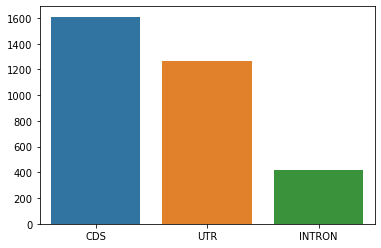

In [41]:
def to_region(cn = cn):
    res_counter = Counter()
    for i in cn:
        if "utr" in i.lower():
            res_counter["UTR"] += cn[i]
        if "intron" in i.lower():
            res_counter["INTRON"] += cn[i]
        if "CDS" == i:
            res_counter[i]+=cn[i]
    return res_counter

res_counter = to_region()
x = ["CDS", "UTR", "INTRON"]
y = [res_counter['CDS'],res_counter['UTR'],res_counter['INTRON']]
sns.barplot(x=x, y=y);

In [42]:
#annotator (m6A peak run annotate --> colunb 8 shows overlap region)

# scientific question: 
1. what is m6A?
N6-methyladenosine (m6A) is responsible for post-transcriptional modification with methylation of eukaryotic mRNAs. DNA methylation is essential for silencing retroviral elements, regulating tissue-specific gene expression, genomic imprinting, and X chromosome inactivation


2. Are m6A known to be different between cell lines?

Yes. https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02012-4 (background section)


3. Given FMRP is CLIPped in neurons, which cell line is the most similar ones that we should compare to?

The one also in neuron.

4. look at one of the m6A files. column 6 is -log 10 p-value; 7 is log 2 fold-change. What is pvalue? what is fold change? (find out at the eCLIP paper, https://www.nature.com/articles/nmeth.3810#Sec10, Normalization of eCLIP signal against SMInput.) Is all of the m6A sites confident? How will you filter them?

Search by ("To quantify the effect of SMInput normalization at the peak level")

p-value: among the data that is considered significant by CLIPer, only were enriched above SMInput (size-matched input control)
* how accurate is the enrichment

fold-change: enrichment of data (increase in binding to histone RNAs)? increased for binding proximal to splicing-array identified alternative splicing events 

p-value ≤ 10^-5 & fold-enrichment ≥ 8

5. after filtering them, recheck overlapping with FMRP

In [ ]:
# 3-4 filter for significant peaks
def filter_m6A_by_pval_and_l2fc(m6A_bed)
    return m6A_bed.filter(lambda x: x[6]>=5 and x[7]>=2) #look at bedtool.filter and lambda function

In [ ]:
# 3-5 recheck overlap with FMRP
for bed in m6A_bed
    filtered=filter_m6A_by_pval_and_l2fc(bed)
    new = filtered.intersct(fmrp_binding_regions,
                      s = True,
                      u = True)
len(new)

# Taks 4: find overlapping proteins with FMRP
which encode protein overlaps most with the encode FMRP?

In [1]:
import pandas as pd
encode_data = pd.read_csv('/home/hsher/projects/katie/encode_data.csv')

In [2]:
encode_data.head() # contains all encode data paths

,Unnamed: 0,uid,RBP,Cell line,bam_0,bam_1,bam_control,minus_0,minus_1,minus_control,...,bed_0,bed_1,Batch,prefix,bam_control_0,bam_control_1,plus_control_0,plus_control_1,minus_control_0,minus_control_1
0,0,203,HNRNPC,HepG2,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,204,RBFOX2,HepG2,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,205,IGF2BP1,HepG2,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,206,HNRNPK,HepG2,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,209,SRSF7,HepG2,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
encode_data.loc[encode_data['RBP']=='FMR1'] # we have FMR1 too here

,Unnamed: 0,uid,RBP,Cell line,bam_0,bam_1,bam_control,minus_0,minus_1,minus_control,...,bed_0,bed_1,Batch,prefix,bam_control_0,bam_control_1,plus_control_0,plus_control_1,minus_control_0,minus_control_1
17,17,236,FMR1,K562,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# the column you want is "IDR" intrinsically disordered region
fmr1_peak = BedTool(encode_data.loc[encode_data['RBP']=='FMR1', 'idr'].iloc[0])

In [8]:
print(fmr1_peak[7])

chr7	128843410	128843449	11.3719381913149	3.50601833023126	+



In [11]:
#4-1 test
#encode_data.loc[0, 'idr']
print(BedTool(encode_data.loc[0, 'idr']))

chr2	54471405	54471429	3.15212781798986	3.67556434300464	+
chr1	222622118	222622220	3.15844363978262	3.79858618770518	+
chr13	98290066	98290139	3.01178357522112	3.02287399473295	+
chr20	49178703	49178753	4.63159688480629	3.20646698524138	-
chr19	331305	331365	4.29281719994904	4.10462336087438	-
chr20	36847805	36847859	4.30430368098166	3.4007496292002	-
chr17	62055327	62055397	3.64959981137792	3.05704474435421	-
chr3	186102573	186102642	6.34796563482034	3.18977531596838	-
chr7	26195082	26195095	13.930977165241	3.7575953196525	-
chr7	30630532	30630592	6.51348267093392	3.79100628411968	+
chr3	177137421	177137492	4.76254021346437	4.09022914916207	-
chr12	2968407	2968462	3.74373554188262	3.03966203527387	+
chr2	148017636	148017693	4.35564187571646	3.17754879410611	-
chr2	101872209	101872236	3.15212781798986	3.86649966067646	+
chr6	161063999	161064130	3.62471726926805	3.96205927253218	+
chr2	28758057	28758109	9.47967986608409	3.71299506165409	+
chr16	57773915	57773939	6.18269356563605	4.0224

In [12]:
#4-1 now overlap FMR1 with all other proteins in encode data. Find which protein it overlaps most with
#use df.iterrows() to loop over encode_data
jaccard=[]
idr_files=[]
not_existed = []
fmr1_RBP=[]
for index, row in encode_data.iterrows():
    idr_file=row['idr']
    try:
        fmr1_RBP.append((len(fmr1_peak.intersect(BedTool(idr_file), s = True, u = True)), index))
        jaccard.append(fmr1_peak.sort().jaccard(BedTool(idr_file).sort()))
    except FileNotFoundError:
        not_existed.append([index, idr_file])

In [219]:
max(fmr1_RBP)

(3242, 17)

In [4]:
#calculate jaccard index for all of them, store in a dataframe.
#visualize your result using bar plots? NIE?
df = pd.DataFrame(jaccard)
df = df[df['jaccard'] != 1]
fig, ax = plt.subplots(1, 1, figsize = [20, 10])
sns.barplot(x = df.index, y = df.jaccard)


NameError: name 'jaccard' is not defined

In [196]:
df

,intersection,union,jaccard,n_intersections
0,0,345022,0.000000,0
1,282,705375,0.000400,4
2,529,426252,0.001241,12
3,39,656224,0.000059,1
4,115,202337,0.000568,1
...,...,...,...,...
323,0,174172,0.000000,0
324,0,176960,0.000000,0
325,143,178581,0.000801,3
326,23,184458,0.000125,1


# 5 Public Data

some suggest another protein MOV10 overlaps with FMRP.

google "MOV10 CLIP" to find any published CLIP data for MOV10? which species is it in? which genome coordinate is the file in (hg19/hg38/mm10).
Download the data. If the data is not in hg38. you need to "liftover"
Overlap MOV10 with FMRP and calculate jaccard index

Clip DATA
https://www.nature.com/articles/s41467-018-06046-y 

g unzip file --> hg19 to 38 --> annotator


In [1]:
from pybedtools import BedTool
mov10_bed=BedTool('/home/yuliang/yuliang/P2_FMRP/MOV_processed.bed')

In [2]:
print(mov10_bed[0])

chr4	308610	308640	1_7511577	18	-	intergenic	intergenic	intergenic	intergenic



In [15]:
fmrp_mov10= fmrp_binding_regions.intersect(mov10_bed,
                              s = True,
                              u = True) 

len(fmrp_mov10)

37

In [17]:
mov10_fmrp= mov10_bed.intersect(fmrp_binding_regions,
                              s = True,
                              u = True) 

len(mov10_fmrp)

481

# 6 Literature review
based on the findings above, what do you think is the specificity of FMRP?
What region does it bind
Read about what people know about FMRP vs m6A/ FMRP vs G4, FMRP vs FXR protein (you should find this pair in part 4, if not, sth is wrong), FMRP vs MOV10......

Article on FMRP-MOV10 https://academic.oup.com/nar/article/48/2/862/5628922

# 7 Coding/bioinformatics skills you (will) learned
you learn what is a bedfile
you learn to use bedtool
in fact bedtool can do a lot more than intersect/filter. This is only a small part of it. learn more reading the bedtool documentation: https://bedtools.readthedocs.io/en/latest/, "interesting usage examples"
you learn about p-value/FC in peak calling
you learn how to perform fisher/chi-square test
you learn about jaccard index
you practiced a lot of for loop/pandas/bedtools
coding skills: list comprehension and lambda functions